<h2>Why Euler's Formula is Used in the Fourier Transform</h2>

<p>
Euler's formula is used in the Fourier Transform because it allows simultaneous representation of both sine and cosine using a single complex exponential:
</p>

<pre><code>e<sup>ix</sup> = cos(x) + i·sin(x)</code></pre>

<p>This offers three key advantages:</p>

<h3>1. Compact Representation</h3>

<p>Instead of using separate sine and cosine terms, we represent both in one exponential form:</p>

<pre><code>cos(x) = (e<sup>ix</sup> + e<sup>-ix</sup>) / 2
sin(x) = (e<sup>ix</sup> - e<sup>-ix</sup>) / (2i)</code></pre>

<p>This simplifies both notation and computation.</p>

<h3>2. Handles Amplitude &amp; Phase Together</h3>

<p>
Using complex exponentials, both <strong>amplitude</strong> and <strong>phase</strong> of a signal are captured naturally:
</p>

<pre><code>X(f) = ∫ x(t) · e<sup>-i2πft</sup> dt</code></pre>

<p>The result <code>X(f)</code> is a complex number, where:</p>
<ul>
  <li><code>|X(f)|</code>: magnitude (how much of the frequency is present)</li>
  <li><code>arg(X(f))</code>: phase shift of that frequency</li>
</ul>

<h3>3. Mathematical Simplicity</h3>

<p>
Differentiation and integration of exponentials is easier and cleaner:
</p>

<pre><code>d/dt [e<sup>i2πft</sup>] = i2πf · e<sup>i2πft</sup></code></pre>

<p>This simplifies Fourier analysis and convolution theorems.</p>

<hr />

<p>
Euler’s formula lets the Fourier Transform <strong>compactly and efficiently encode both magnitude and phase information</strong> using complex exponentials, enabling powerful mathematical tools for signal analysis.
</p>

<hr>
<h2>Discrete Euler's Formula</h2>

<pre><code>e<sup>i2πkn/N</sup> = cos(2πkn/N) + i·sin(2πkn/N)</code></pre>

<h3>Components Explained:</h3>

<ul>
  <li><code>e</code>: Euler's number (~2.718), base of natural logarithms.</li>
  <li><code>i</code>: Imaginary unit, where <code>i² = -1</code>.</li>
  <li><code>2π</code>: Full circle in radians (360° = 2π radians).</li>
  <li><code>k</code>: Frequency index (which "bin" or harmonic component we're analyzing).</li>
  <li><code>n</code>: Time index (specific point in the signal).</li>
  <li><code>N</code>: Total number of samples in the signal (or DFT length).</li>
</ul>

<p>
This formula is at the heart of the <strong>Discrete Fourier Transform (DFT)</strong>. It allows us to express sinusoidal oscillations as complex exponentials, which can be added together to analyze or reconstruct signals.
</p>

<h3>Used in DFT Formula:</h3>

<pre><code>
X[k] = Σ<sub>n=0</sub><sup>N−1</sup> x[n] · e<sup>-i2πkn/N</sup>
</code></pre>

<p>
Where:
<ul>
  <li><code>x[n]</code> is the time-domain signal.</li>
  <li><code>X[k]</code> is the frequency-domain output.</li>
</ul>
</p>

<hr />

<h3>Summary:</h3>
<p>
Discrete Euler's Formula transforms the sum of sines and cosines into a compact exponential form, enabling efficient frequency analysis using the Discrete Fourier Transform.
</p>
<hr>

In [104]:
# Now practice with a simple sinusoidal wave 

import numpy as np
import matplotlib.pyplot as plt


fs = 1000                                 # Sampling frequency (sample rate)
T = 1                                     # Signal duration (1 sec)
N = fs * T                                # Waveform  number of value counts
t = np.linspace(0, T, N, endpoint=False)  # Time (at which a point is stored)

In [144]:
f1, f2 = 50, 120                                               # Frequencies
a1, a2 = 1.0, 1.0


signal = a1 * np.sin(2 * np.pi * f1 * t + np.pi/4) + \
         a2 * np.sin(2 * np.pi * f2 * t + np.pi/3)

# 2 * np.pi is an angular full rotation of sine
# t is time value at a specific point
# pi/4 is 45 degrees of phase shift of a function
# pi/2 is 90 degrees of phase shift of a function

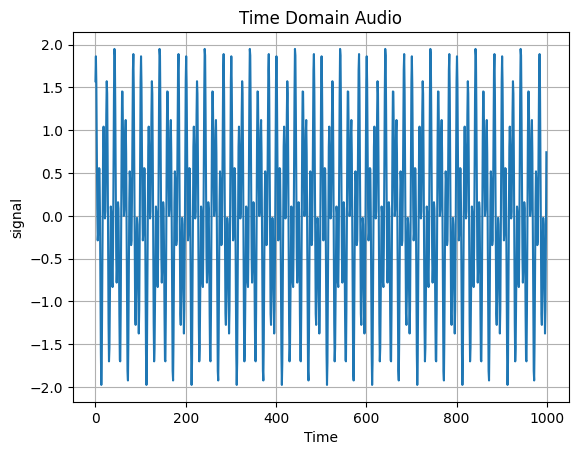

In [145]:
plt.plot(signal)
plt.title('Time Domain Audio')
plt.xlabel('Time')
plt.ylabel('signal')
plt.grid(True)

In [160]:
# Custom DFT implementation
def custom_dft(x):
    N = len(x)
    X = []
    for k in range(N):     # k - freq index
        s = 0
        for n in range(N): # n - time index
            angle = -2j * np.pi * k * n / N
            s += x[n] * np.exp(angle)
        X.append(s)
    return np.array(X)

In [166]:
X = custom_dft(signal)

# Frequencies
freq = np.fft.fftfreq(N, d=1/fs)

<h5>From the DFT output, I get:</h5>

- the magnitude, which tells me how strong each frequency is (its amplitude),

- and the angle, which represents the phase shift of the complex sinusoid made of cosine and sine, rotating in the complex plane via Euler’s formula.”

In [148]:
# Only take the positive half
half = N // 2
freq = freq[:half]
X = X[:half]

In [159]:
# 5. Magnitude and Phase
magnitude = np.abs(X)   # np.sqr(a^2 + b^2)
phase = np.angle(X)     # # arctan2(b_i, a)

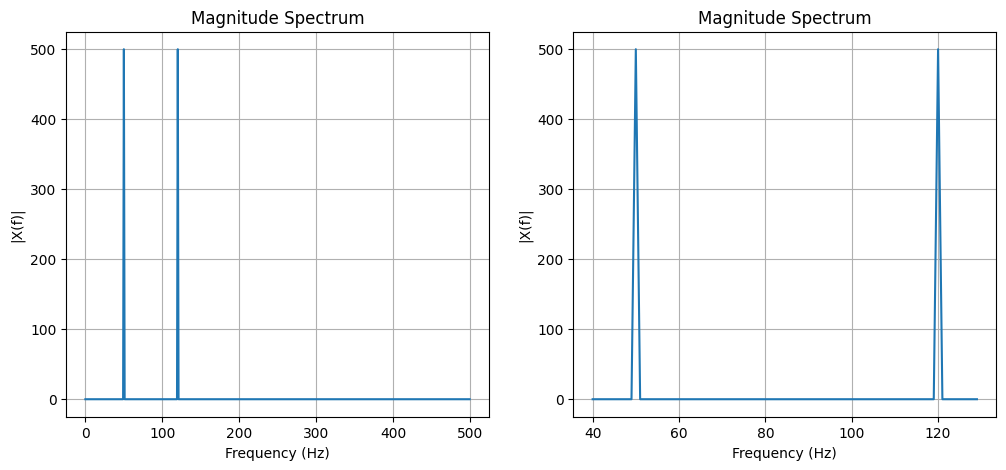

In [150]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(freq, magnitude)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(freq[40:130], magnitude[40:130])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.grid(True)
plt.show()

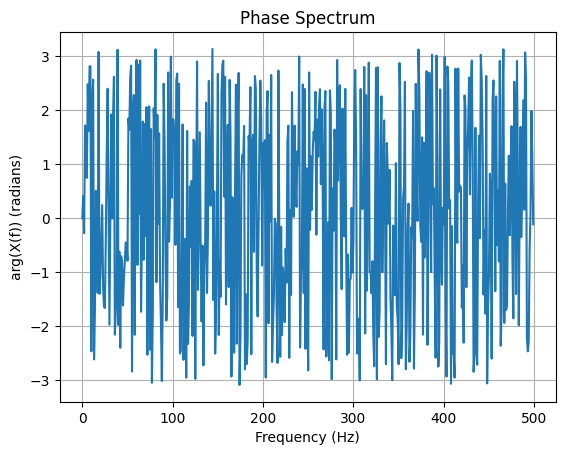

In [151]:
plt.plot(freq, phase)
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('arg(X(f)) (radians)')
plt.grid(True)

## What Is "Phase" in the Fourier Transform?

When you apply the **Fourier Transform** to a signal, you get:

$$
X(f) = A(f) \cdot e^{j\phi(f)}
$$

Where:

- A(f)is the **magnitude** (how strong each frequency is),
- \phi(f) is the **phase angle** (how delayed or shifted that frequency component is).

So:

> The **phase spectrum** tells you **how each sinusoidal component is shifted** relative to a reference point (usually \( t = 0 \)).

---

## How to Read This Plot

- **Sharp jumps** from \( \pi \) to \( -\pi \) (or vice versa) are normal:  
  These are called **phase wraps** due to the modulo \( 2\pi \) nature of angle measurement.

- If the plot looks **random or noisy**, it usually means:
  - Your signal has **many non-dominant frequencies** with small amplitudes, or
  - You're plotting phase for **all frequencies**, even where the magnitude is nearly zero  
    → these phases become **meaningless/noisy**.


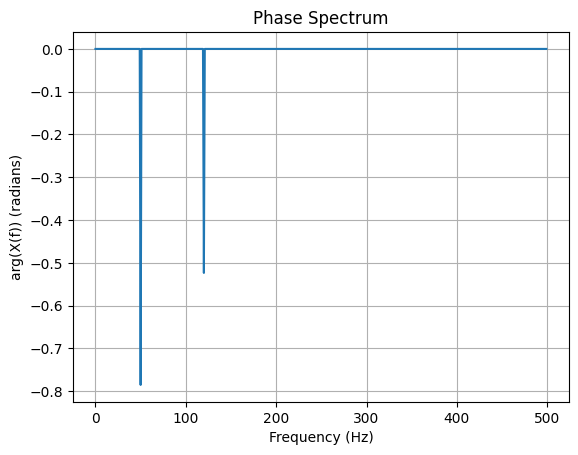

In [152]:
# If you want to see meaningful phase:
# Plot phase only where magnitude is significant:

threshold = 0.01 * np.max(magnitude)
phase_cleaned = phase.copy()
phase_cleaned[magnitude < threshold] = 0

plt.plot(freq, phase_cleaned)
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('arg(X(f)) (radians)')
plt.grid(True)

In [142]:
# Assume you have: fft_result, freq, phase, magnitude
idx_50 = np.argmin(np.abs(freq - 50))
idx_120 = np.argmin(np.abs(freq - 120))

print(f"Frequency ~50 Hz → Phase = {phase[idx_50]:.4f} radians")
print(f"Frequency ~120 Hz → Phase = {phase[idx_120]:.4f} radians")

Frequency ~50 Hz → Phase = -0.7854 radians
Frequency ~120 Hz → Phase = 0.0000 radians


In [143]:
idx_120_pos = np.argmin(np.abs(freq - 120))
idx_120_neg = np.argmin(np.abs(freq + 120))

print(f"Frequency +120 Hz → Phase = {phase[idx_120_pos]:.4f}")
print(f"Frequency -120 Hz → Phase = {phase[idx_120_neg]:.4f}")

Frequency +120 Hz → Phase = 0.0000
Frequency -120 Hz → Phase = 0.0000


<hr>

Why does sine function phase is equal to 0? 
because, 

- The 50 Hz component is sin(2π·50t + π/4) → phase = π/4 – π/2 = –π/4

- The 120 Hz component is sin(2π·120t + π/2) = cos(2π·120t) → phase = 0

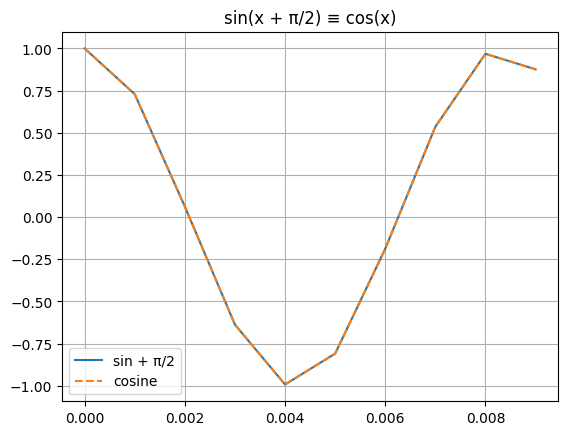

In [156]:
plt.title("sin(x + π/2) ≡ cos(x)")
plt.plot(t[:10], np.sin(2*np.pi*f2*t[:10] + np.pi/2), label='sin + π/2')
plt.plot(t[:10], np.cos(2*np.pi*f2*t[:10]), '--', label='cosine')
plt.legend()
plt.grid(True)
plt.show()

<hr>

## Inverse Discrete Fourier Transform (IDFT)

### Formula

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{+2\pi i \cdot \frac{k n}{N}}
$$

### Notes

- The sign in the exponential is **positive** (unlike DFT).
- You **divide by \( N \)** to normalize.
- \( X[k] \) are complex frequency components.
- The result \( x[n] \) will typically be complex (can take the real part if needed).

---

In [163]:
# Re-generate the original signal from frequency to time domain

def custom_idft(X):
    N = len(X)
    x = []
    for n in range(N):     # n - time index
        s = 0
        for k in range(N): # k - freq index
            angle = 2j * np.pi * k * n / N
            s += X[k] * np.exp(angle)
        x.append(s / N)
    return np.array(x)

In [174]:
reconstructed = custom_idft(X)
reconstructed = np.real(reconstructed)

In [177]:
mse = np.mean((reconstructed - signal) ** 2)
mse

2.887035901942993e-26

In [178]:
# Pretty tiny error